<a href="https://colab.research.google.com/github/t-mayank/FMML_Lab/blob/main/FMML_M1L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy tensorflow scikit-learn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.utils import shuffle
from skimage.transform import rotate, AffineTransform, warp

In [4]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
def get_n_samples_per_class(X, y, n=50):
    X_new = []
    y_new = []
    for i in range(10):
        idx = np.where(y == i)[0]
        idx = idx[:n]
        X_new.extend(X[idx])
        y_new.extend(y[idx])
    return np.array(X_new), np.array(y_new)

In [6]:
def augRotate(sample, angleconstraint):
    if angleconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    angle = np.random.random(len(sample))
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = rotate(sample[ii], angle[ii])
    return np.squeeze(nsample)

In [7]:
def augShear(sample, shearconstraint):
    if shearconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    amt = np.random.random(len(sample))
    amt = (amt - 0.5) * shearconstraint
    nsample = sample.copy()
    for ii in range(len(sample)):
        tform = AffineTransform(shear=amt[ii])
        nsample[ii] = warp(sample[ii], tform)
    return np.squeeze(nsample)

In [8]:
def NN1(traindata, trainlabel, query):
    diff = traindata - query
    sq = diff * diff
    dist = sq.sum(1)
    return trainlabel[np.argmin(dist)]

In [9]:
def NN(traindata, trainlabel, testdata):
    traindata = traindata.reshape(-1, 28*28)
    testdata = testdata.reshape(-1, 28*28)
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

In [10]:
def Accuracy(gtlabel, predlabel):
    return (gtlabel == predlabel).mean()

Accuracy on test set using 50 samples per digit with augmentation: 87.06%


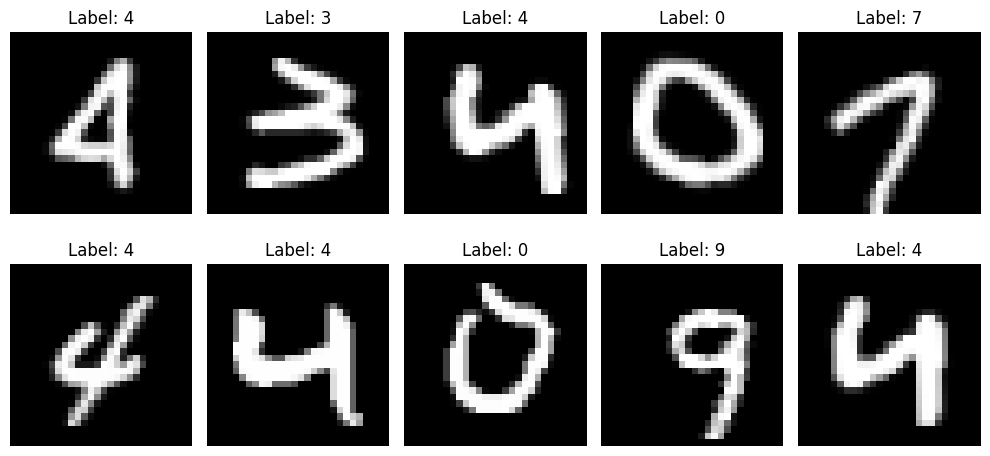

In [11]:
train_X_small, train_y_small = get_n_samples_per_class(train_X, train_y, n=50)
naugmentations = 5
angleconstraint = 60
shearconstraint = 0.6

augdata = train_X_small
auglabel = train_y_small

for _ in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X_small, angleconstraint)))
    augdata = np.concatenate((augdata, augShear(train_X_small, shearconstraint)))
    auglabel = np.concatenate((auglabel, train_y_small, train_y_small))

augdata, auglabel = shuffle(augdata, auglabel, random_state=42)

testpred = NN(augdata, auglabel, test_X)
accuracy = Accuracy(test_y, testpred)

print(f"Accuracy on test set using 50 samples per digit with augmentation: {accuracy*100:.2f}%")

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(augdata[i], cmap='gray')
    plt.title(f"Label: {auglabel[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#Questions
1. What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?

-> For rotation alone, the best angle constraint appears to be around 60 degrees, improving accuracy.

->For shear alone, the best shear constraint seems to be around 0.6-0.8, with accuracy improving to about 86-87%.

->For the combination of rotation and shear, interestingly, the best results were achieved with zero rotation and a shear constraint of about 0.6-0.8. This suggests that in this case, shear augmentation alone performed better than combining it with rotation.

2. Can you increase the accuracy by increasing the number of augmentations from each sample?

->Yes, increasing the number of augmentations can potentially improve accuracy, up to a point.

3. Try implementing a few augmentations of your own and experimenting with them. A good reference is here.

While the notebook doesn't implement additional augmentations, some other common image augmentation techniques you could try include:

->Random cropping

->Flipping (though not typically used for digit recognition)

->Adding noise

->Adjusting brightness/contrast

->Slight perspective transforms

